# 5.2 Apply Data Storytelling Exercise


## Submission Questions

1. Pick a dataset - ideally the dataset for your Capstone. If for some reason you want to do this on a different data set, you can find one on Mode Analytics or Google's public data sets directory, or pick another one you like from elsewhere.

   1. Can you count something interesting?
   2. Can you find some trends (high, low, increase, decrease, anomalies)?
   3. Can you make a bar plot or a histogram?
   4. Can you compare two related quantities?
   5. Can you make a scatterplot?
   6. Can you make a time-series plot?
   
2. Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

3. By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?

## Response

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the clean data file
input_file_name = "clean_data_diabetes.csv"
cleandata_df = pd.read_csv(input_file_name, sep = '\t', engine='python')

In [3]:
#shape of the dataframe
cleandata_df.shape

(101766, 50)

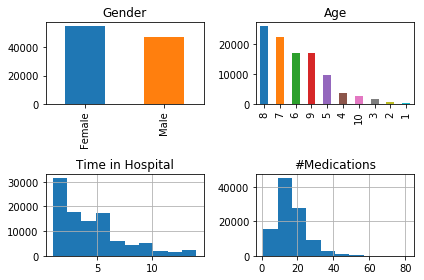

In [4]:
#bar charts for categorical data and histograms for continuous
plt.subplot(2,2,1)
cleandata_df['gender'].value_counts().plot(kind = 'bar')
plt.title('Gender')

plt.subplot(2,2,2)
cleandata_df['age'].value_counts().plot(kind = 'bar')
plt.title('Age')

plt.subplot(2,2,3)
cleandata_df['time_in_hospital'].hist()
plt.title('Time in Hospital')

plt.subplot(2,2,4)
cleandata_df['num_medications'].hist()
plt.title('#Medications')

plt.tight_layout()
plt.show()

In [5]:
#seaborn for visualizations
sns.set(style="ticks", color_codes=True)

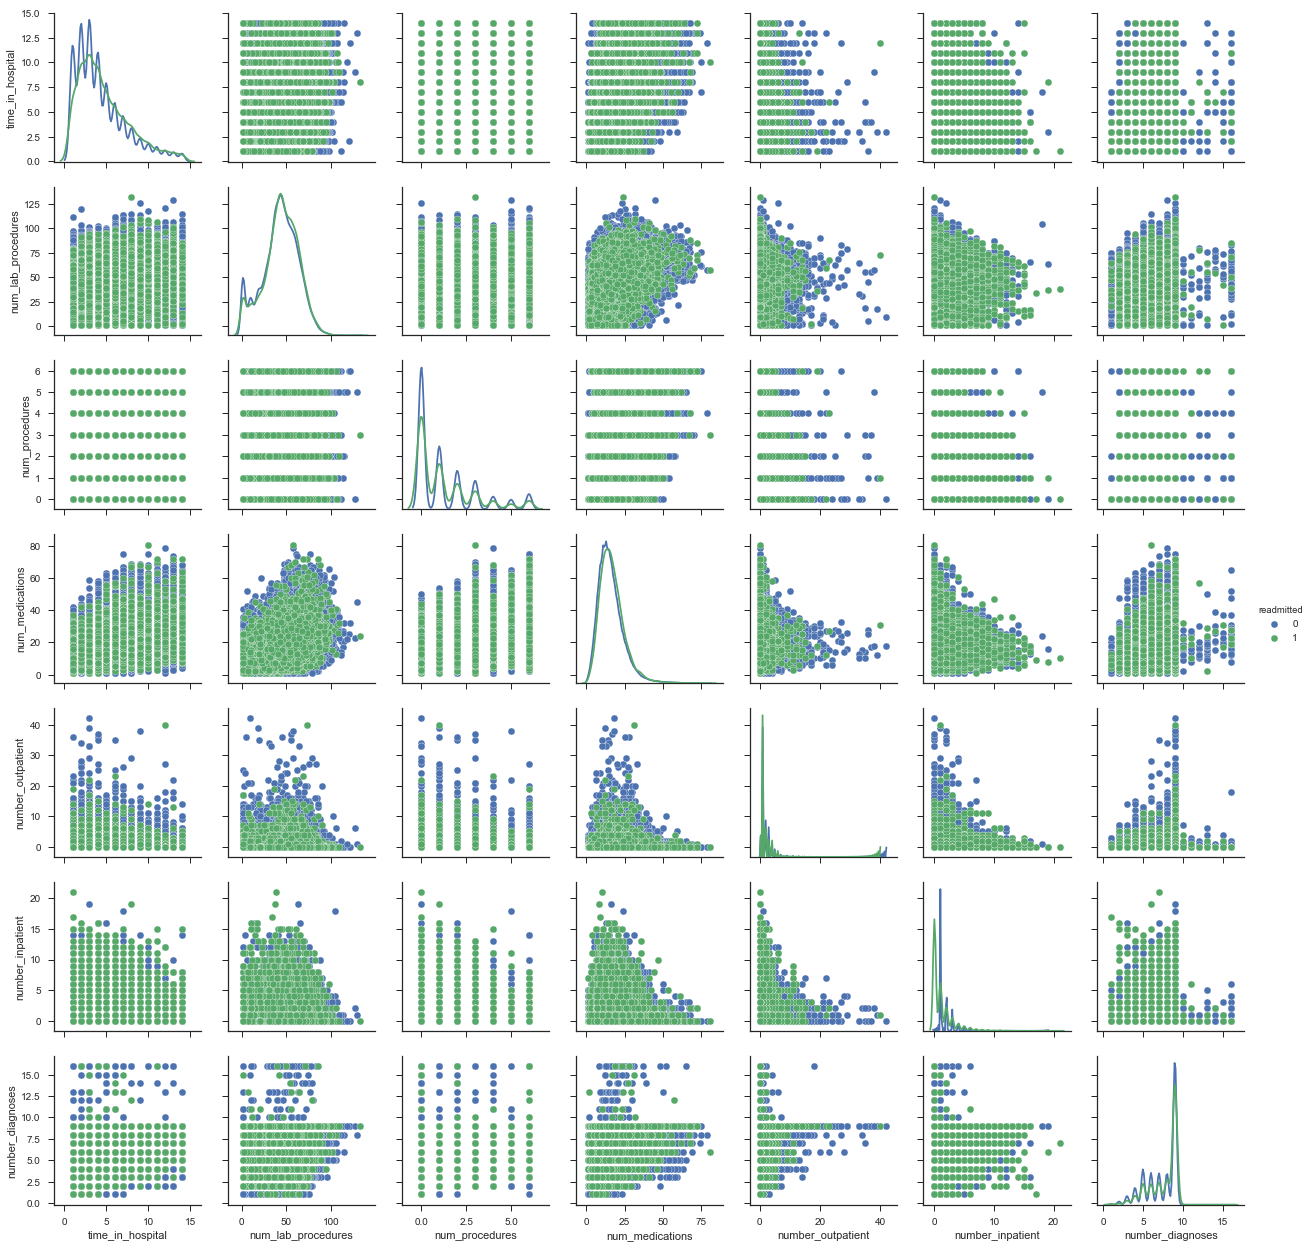

In [6]:
#pairgrid using seaborn
sns.pairplot(cleandata_df, vars = ["time_in_hospital", "num_lab_procedures",
                                   "num_procedures", "num_medications", 
                                   "number_outpatient", "number_inpatient", 
                                   "number_diagnoses"], 
            hue = "readmitted", diag_kind = "kde")

In [7]:
#correlation matrix
correlation_matrix = cleandata_df[["time_in_hospital", "num_lab_procedures",
                                   "num_procedures", "num_medications", 
                                   "number_outpatient", "number_inpatient", 
                                   "number_diagnoses","readmitted"]].copy()
correlation_matrix.corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_inpatient,number_diagnoses,readmitted
time_in_hospital,1.000000,0.318450,0.191472,0.466135,-0.008916,0.073623,0.220186,0.044199
num_lab_procedures,0.318450,1.000000,0.058066,0.268161,-0.007602,0.039231,0.152773,0.020364
num_procedures,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.066236,0.073734,-0.012227
num_medications,0.466135,0.268161,0.385767,1.000000,0.045197,0.064194,0.261526,0.038432
number_outpatient,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.107338,0.094152,0.018893
number_inpatient,0.073623,0.039231,-0.066236,0.064194,0.107338,1.000000,0.104710,0.165147
number_diagnoses,0.220186,0.152773,0.073734,0.261526,0.094152,0.104710,1.000000,0.049524
readmitted,0.044199,0.020364,-0.012227,0.038432,0.018893,0.165147,0.049524,1.000000
